In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

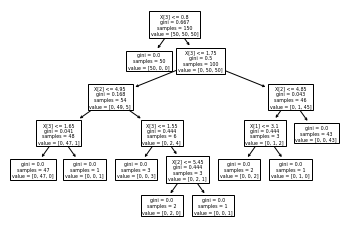

In [3]:
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

In [4]:
iris = pd.read_csv(r'C:\Users\Darya\Downloads\iris.data', header=None)
iris.columns=['sepal length','sepal width', 'petal length', 'petal width', 'class']


In [5]:
X =  iris.drop(['class'], axis=1)
y = iris['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.96

In [7]:
features = [columns for columns in X_train.columns]
print(features)

['sepal length', 'sepal width', 'petal length', 'petal width']


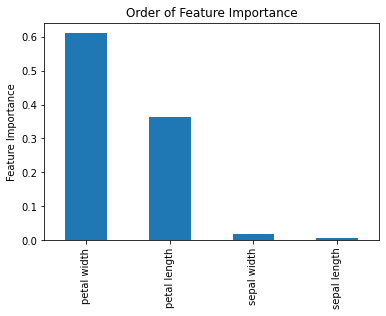

In [8]:
def GBC_model(clf, train, y_train, features):
    clf.fit(train[features], y_train)
    probab_of_predict = clf.predict_proba(train[features])[:,1]
    predict_train = clf.predict(train[features])
    Relative_Feature_importance = pd.Series(clf.feature_importances_, features).sort_values(ascending=False)
    Relative_Feature_importance.plot(kind='bar', title='Order of Feature Importance')
    plt.ylabel('Feature Importance')
    plt.show()
    
clf = GradientBoostingClassifier(random_state=15)   
GBC_model(clf, X_train, y_train, features)

[Text(167.4, 181.2, 'X[3] <= 1.75\nfriedman_mse = 0.222\nsamples = 150\nvalue = 0.0'),
 Text(83.7, 108.72, 'X[2] <= 4.95\nfriedman_mse = 0.046\nsamples = 104\nvalue = -0.285'),
 Text(41.85, 36.23999999999998, 'friedman_mse = 0.01\nsamples = 98\nvalue = -1.454'),
 Text(125.55000000000001, 36.23999999999998, 'friedman_mse = 0.222\nsamples = 6\nvalue = 1.5'),
 Text(251.10000000000002, 108.72, 'X[2] <= 4.85\nfriedman_mse = 0.021\nsamples = 46\nvalue = 0.645'),
 Text(209.25, 36.23999999999998, 'friedman_mse = 0.222\nsamples = 3\nvalue = 1.5'),
 Text(292.95, 36.23999999999998, 'friedman_mse = -0.0\nsamples = 43\nvalue = 3.0')]

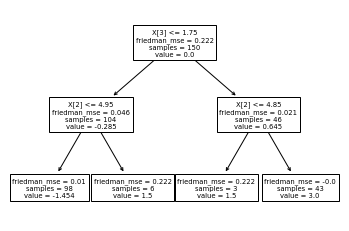

In [9]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
X, y = load_iris(return_X_y=True)
# there are 150 observations and 4 features

# let's build a small model = 5 trees with depth no more than 2
model = GradientBoostingClassifier(n_estimators=5, max_depth=2, learning_rate=1.0)
model.fit(X, y==2) # predict 2nd class vs rest, for simplicity
# we can access individual trees
trees = model.estimators_.ravel()

# there are 150 observations, each is encoded by 5 trees, each tree has 1 output
applied = model.apply(X) 

tree.plot_tree(trees[0])


[Text(167.4, 181.2, 'X[3] <= 1.65\nfriedman_mse = 0.027\nsamples = 150\nvalue = -0.037'),
 Text(83.7, 108.72, 'X[2] <= 5.35\nfriedman_mse = 0.01\nsamples = 102\nvalue = -0.094'),
 Text(41.85, 36.23999999999998, 'friedman_mse = 0.007\nsamples = 100\nvalue = -1.051'),
 Text(125.55000000000001, 36.23999999999998, 'friedman_mse = 0.0\nsamples = 2\nvalue = 1.446'),
 Text(251.10000000000002, 108.72, 'X[2] <= 4.65\nfriedman_mse = 0.041\nsamples = 48\nvalue = 0.084'),
 Text(209.25, 36.23999999999998, 'friedman_mse = 0.0\nsamples = 1\nvalue = 9.561'),
 Text(292.95, 36.23999999999998, 'friedman_mse = 0.027\nsamples = 47\nvalue = 0.712')]

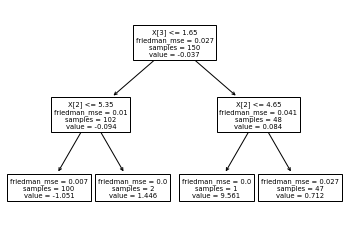

In [10]:
tree.plot_tree(trees[1])

[Text(167.4, 181.2, 'X[2] <= 5.05\nfriedman_mse = 0.016\nsamples = 150\nvalue = -0.015'),
 Text(83.7, 108.72, 'X[0] <= 6.65\nfriedman_mse = 0.016\nsamples = 108\nvalue = -0.04'),
 Text(41.85, 36.23999999999998, 'friedman_mse = 0.011\nsamples = 102\nvalue = -0.748'),
 Text(125.55000000000001, 36.23999999999998, 'friedman_mse = 0.085\nsamples = 6\nvalue = -3.027'),
 Text(251.10000000000002, 108.72, 'X[3] <= 1.55\nfriedman_mse = 0.012\nsamples = 42\nvalue = 0.05'),
 Text(209.25, 36.23999999999998, 'friedman_mse = 0.054\nsamples = 2\nvalue = 1.973'),
 Text(292.95, 36.23999999999998, 'friedman_mse = 0.006\nsamples = 40\nvalue = 0.706')]

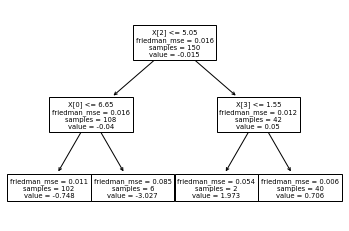

In [11]:
tree.plot_tree(trees[2])

[Text(167.4, 181.2, 'X[1] <= 2.25\nfriedman_mse = 0.012\nsamples = 150\nvalue = -0.002'),
 Text(83.7, 108.72, 'X[2] <= 4.75\nfriedman_mse = 0.105\nsamples = 4\nvalue = 0.168'),
 Text(41.85, 36.23999999999998, 'friedman_mse = 0.0\nsamples = 3\nvalue = -1.019'),
 Text(125.55000000000001, 36.23999999999998, 'friedman_mse = 0.0\nsamples = 1\nvalue = 3.697'),
 Text(251.10000000000002, 108.72, 'X[3] <= 1.75\nfriedman_mse = 0.008\nsamples = 146\nvalue = -0.007'),
 Text(209.25, 36.23999999999998, 'friedman_mse = 0.004\nsamples = 100\nvalue = -1.016'),
 Text(292.95, 36.23999999999998, 'friedman_mse = 0.015\nsamples = 46\nvalue = 0.674')]

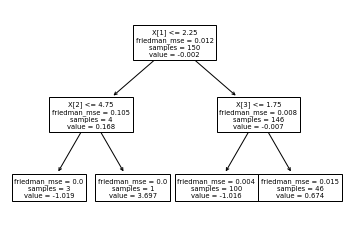

In [12]:
tree.plot_tree(trees[3])

[Text(167.4, 181.2, 'X[0] <= 6.05\nfriedman_mse = 0.007\nsamples = 150\nvalue = -0.002'),
 Text(83.7, 108.72, 'X[0] <= 5.85\nfriedman_mse = 0.009\nsamples = 89\nvalue = -0.015'),
 Text(41.85, 36.23999999999998, 'friedman_mse = 0.0\nsamples = 80\nvalue = -0.58'),
 Text(125.55000000000001, 36.23999999999998, 'friedman_mse = 0.081\nsamples = 9\nvalue = -1.465'),
 Text(251.10000000000002, 108.72, 'X[2] <= 4.75\nfriedman_mse = 0.003\nsamples = 61\nvalue = 0.018'),
 Text(209.25, 36.23999999999998, 'friedman_mse = 0.0\nsamples = 16\nvalue = -1.007'),
 Text(292.95, 36.23999999999998, 'friedman_mse = 0.003\nsamples = 45\nvalue = 1.013')]

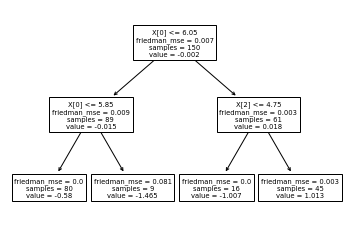

In [13]:
tree.plot_tree(trees[4])

In [14]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X, y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9666666666666668 {'max_depth': 4}


In [19]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=2e5ab8a89a565ea122bc2ad67689ff9a3b1439dc82846781c47cf0bac535ac54
  Stored in directory: c:\users\darya\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


You should consider upgrading via the 'C:\Games\conda\python.exe -m pip install --upgrade pip' command.


In [45]:
import numpy as np
import pandas as pd
from sklearn import tree
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from pprint import pprint


# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
depth = []
diapazon = []
for i in range(3,200):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X= X, y=y, cv=7, n_jobs=4)
    depth.append((scores.mean()))
    diapazon.append(i)


(0.0, 25.0)

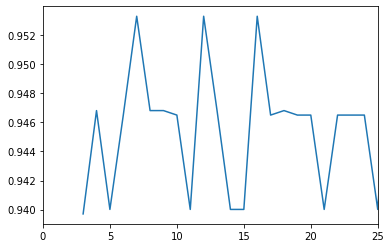

In [46]:
plt.plot(diapazon, depth)
#plt.xlim([0,25])

In [37]:
depth = []
diapazon = []
for i in range(3,200):
    #clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = GradientBoostingClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X= X, y=y, cv=7, n_jobs=4)
    depth.append((scores.mean()))
    diapazon.append(i)

(0.0, 25.0)

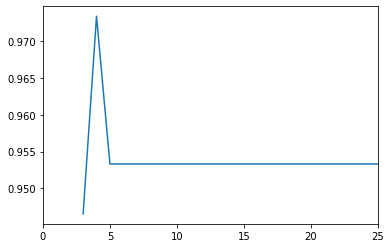

In [38]:
plt.plot(diapazon, depth)
plt.xlim([0,25])

In [39]:
from sklearn.ensemble import RandomForestClassifier

depth = []
diapazon = []
for i in range(3,200):
    #clf = tree.DecisionTreeClassifier(max_depth=i)
    
    clf = RandomForestClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X= X, y=y, cv=7, n_jobs=4)
    depth.append((scores.mean()))
    diapazon.append(i)

(0.0, 25.0)

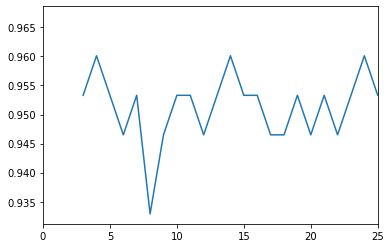

In [40]:
plt.plot(diapazon, depth)
plt.xlim([0,25])